In [1]:

import matplotlib.pyplot as plt
# import numpy as np
# import pandas as pd
# import matplotlib.pyplot as plt
# import seaborn as sns
from utils import data

In [2]:
%run exploration.ipynb

id:
	 Unique count: 10841
	 Too Many Values

App:
	 Unique count: 9660
	 Too Many Values

Category:
	 Unique count: 34
	 ['ART_AND_DESIGN' 'AUTO_AND_VEHICLES' 'BEAUTY' 'BOOKS_AND_REFERENCE'
 'BUSINESS' 'COMICS' 'COMMUNICATION' 'DATING' 'EDUCATION' 'ENTERTAINMENT'
 'EVENTS' 'FINANCE' 'FOOD_AND_DRINK' 'HEALTH_AND_FITNESS' 'HOUSE_AND_HOME'
 'LIBRARIES_AND_DEMO' 'LIFESTYLE' 'GAME' 'FAMILY' 'MEDICAL' 'SOCIAL'
 'SHOPPING' 'PHOTOGRAPHY' 'SPORTS' 'TRAVEL_AND_LOCAL' 'TOOLS'
 'PERSONALIZATION' 'PRODUCTIVITY' 'PARENTING' 'WEATHER' 'VIDEO_PLAYERS'
 'NEWS_AND_MAGAZINES' 'MAPS_AND_NAVIGATION' '1.9']

Rating:
	 Unique count: 41
	 [ 4.1  3.9  4.7  4.5  4.3  4.4  3.8  4.2  4.6  3.2  4.   nan  4.8  4.9
  3.6  3.7  3.3  3.4  3.5  3.1  5.   2.6  3.   1.9  2.5  2.8  2.7  1.
  2.9  2.3  2.2  1.7  2.   1.8  2.4  1.6  2.1  1.4  1.5  1.2 19. ]

Reviews:
	 Unique count: 6002
	 Too Many Values

Size:
	 Unique count: 462
	 Too Many Values

Installs:
	 Unique count: 22
	 ['10,000+' '500,000+' '5,000,000+' '50,000,

In [3]:
%run cleaning.ipynb

C:\Users\clement\AppData\Local\Temp\ipykernel_2540\3656646732.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Last Updated"] = data["Last Updated"].apply(lambda x: parse(x))
<>:1: SyntaxWarning: invalid escape sequence '\+'
C:\Users\clement\AppData\Local\Temp\ipykernel_2540\3117570306.py:1: SyntaxWarning: invalid escape sequence '\+'
  data['Installs'] = data['Installs'].replace('[\+,]', '', regex=True).astype(int)
C:\Users\clement\AppData\Local\Temp\ipykernel_2540\3117570306.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#re

## Moyenne du nombre de téléchargements par catégorie d'applications

Préparation des données

In [4]:
# Calculer le nombre total de téléchargements par catégorie
total_downloads_by_category = data.groupby('Category')['Installs'].sum().sort_values()
# Calculer le nombre total d'applications par catégorie
total_apps_by_category = data['Category'].value_counts()
# Calculer la moyenne des téléchargements par catégorie
average_downloads_by_category = total_downloads_by_category / total_apps_by_category
# Trier les catégories d'applications par ordre croissant de moyenne de téléchargements
average_downloads_by_category = average_downloads_by_category.sort_values(ascending=True)

Créer un graphe histogramme

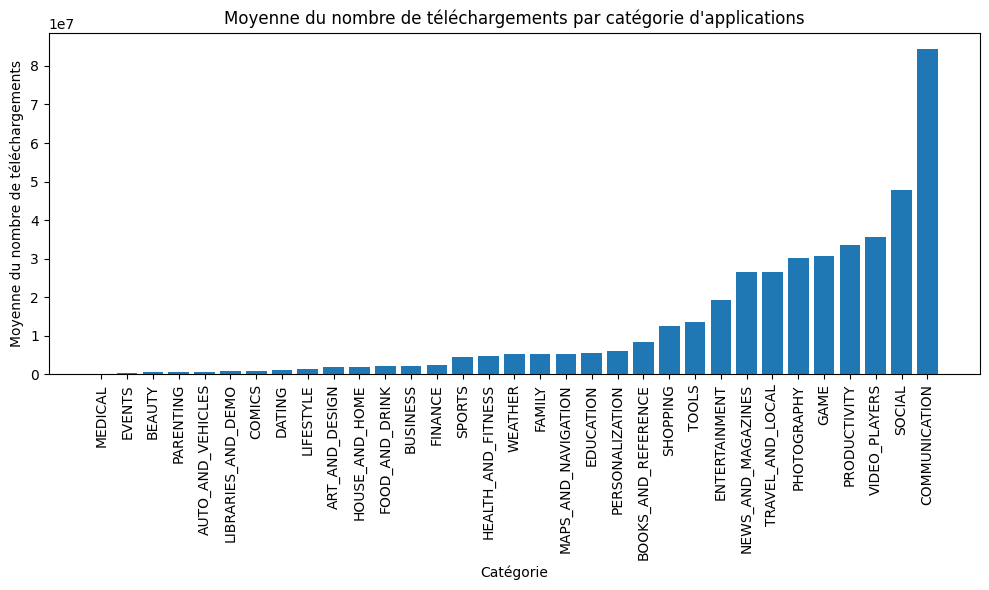

In [5]:
plt.figure(figsize=(10, 6))
plt.bar(average_downloads_by_category.index, average_downloads_by_category)
plt.title('Moyenne du nombre de téléchargements par catégorie d\'applications')
plt.xlabel('Catégorie')
plt.ylabel('Moyenne du nombre de téléchargements')
plt.xticks(rotation=90)  # Rotation des étiquettes sur l'axe des x pour plus de lisibilité
plt.tight_layout()  # Ajuster automatiquement la disposition pour éviter que les étiquettes ne se chevauchent
plt.show()

# Nombre d'application gratuite et payante

In [8]:
types = data["Type"]
type_counts = types.value_counts()

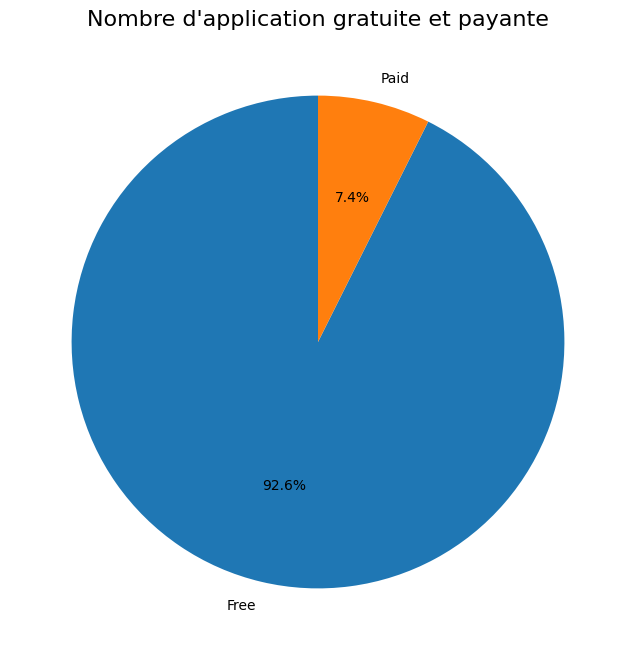

In [9]:
plt.figure(figsize=(8, 8))
plt.pie(type_counts, labels=type_counts.index, autopct='%1.1f%%', startangle=90)
plt.title("Nombre d'application gratuite et payante", fontsize=16)
plt.show()